In [1]:
# load dataset wine
from sklearn.datasets import load_wine
import pandas as pd

# load the dataset
wine = load_wine()

# Convert dataset use pandas
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [2]:
# EDA

print('Cek isi data dengan statistik deskriptif\n', df.describe())

print('5 data teratas\n', df.head())

print('\nCek Missing Values', df.isnull().sum())

Cek isi data dengan statistik deskriptif
           alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.

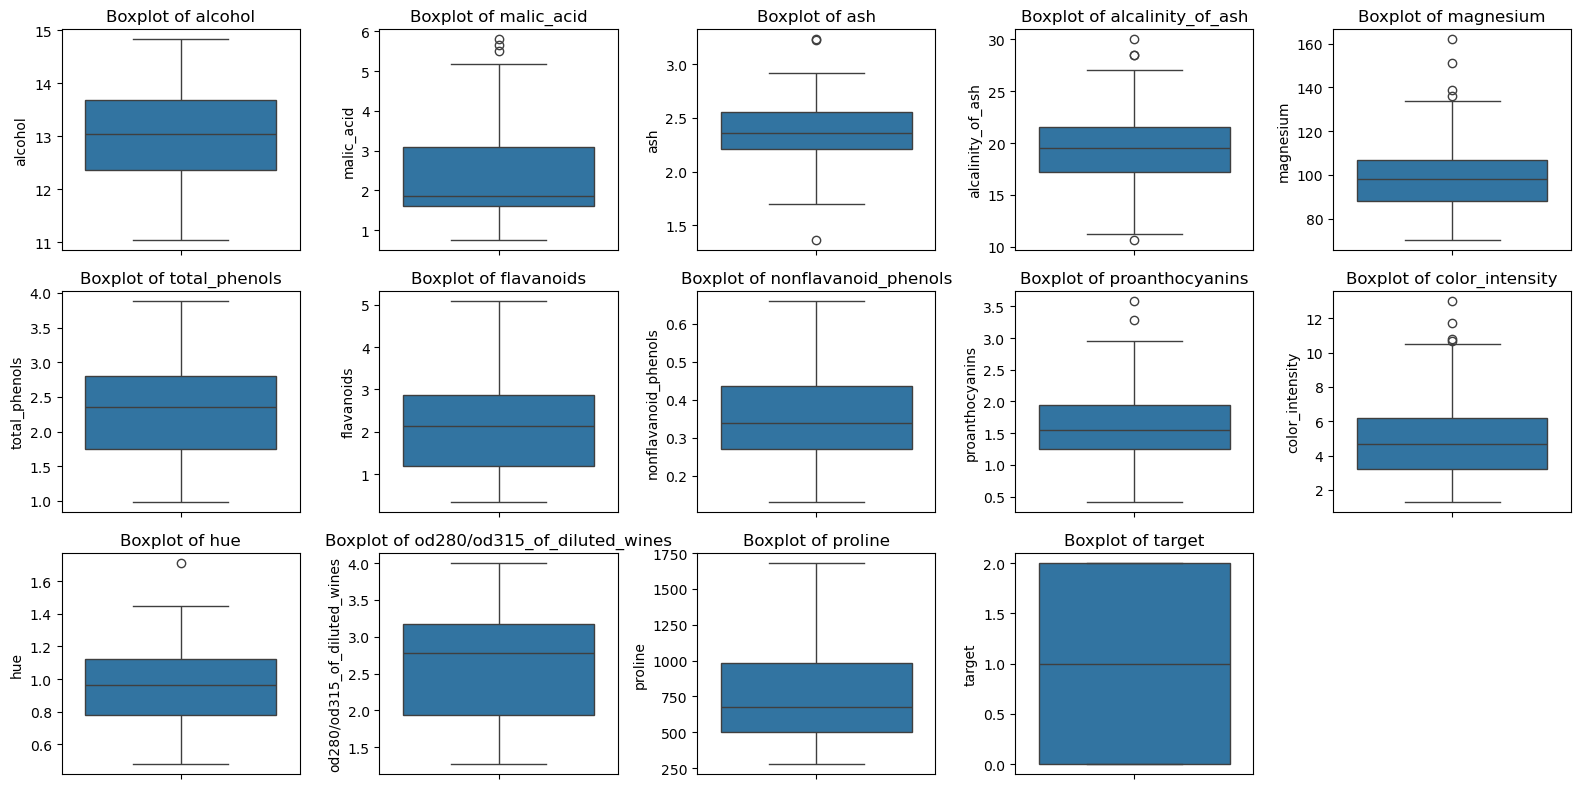

In [21]:
# Cek Outlier
import seaborn as sns 
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(16, 8))

# Create a boxplot for each feature in the dataframe
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


## Gak perlu Handle Outlier karna
### Jumlahnya sedikit → Kebanyakan outlier cuma 1–3 titik di setiap feature.
### Dataset wine dari scikit-learn udah rapi dan siap modeling, jadi outlier-nya bisa dianggap sebagai variasi alami data.
### Beberapa model kayak KNN, Random Forest, XGBoost cukup robust terhadap outlier kecil.
### Bisa jadi outlier itu penting, apalagi kalau mereka mewakili ciri khas jenis wine tertentu.

In [24]:
# Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# pisahkan X dan Y
X = df.drop(columns=['target'])
y = df['target']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Scaling
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled = scaled.transform(X_test)

Classification report :
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



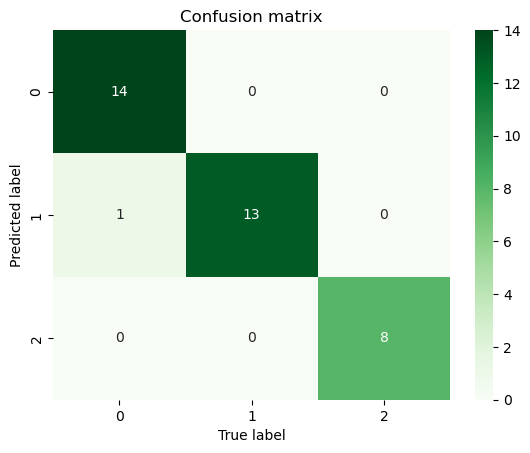

In [25]:
# modeling

from sklearn.neighbors import KNeighborsClassifier

# definiskan Model
knn = KNeighborsClassifier(n_neighbors=10)

# fitting model
knn.fit(X_train_scaled, y_train)

# prediksi model
y_pred = knn.predict(X_test_scaled)

# evaluasi model 
from sklearn.metrics import classification_report

print(f'Classification report :\n {classification_report(y_test, y_pred)}')

# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# visulaisasi confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', cbar=True)
plt.title('Confusion matrix')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

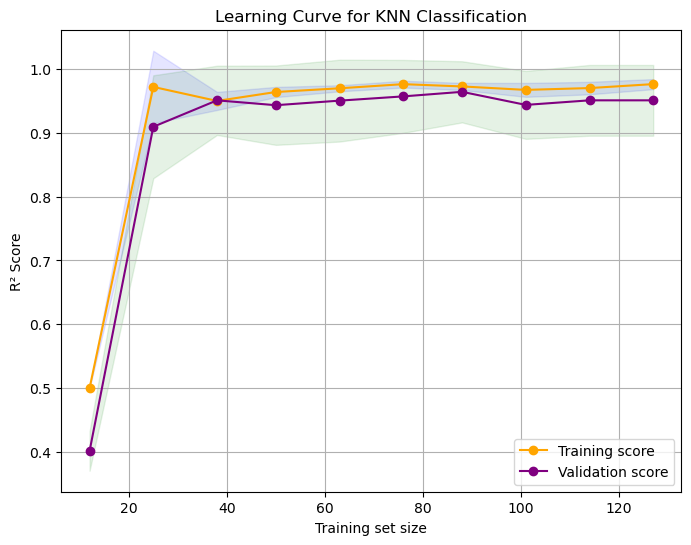

In [26]:
# learning curve

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    knn, X_train_scaled, y_train, cv=10, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Hitung rata-rata dan standar deviasi
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='orange', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='purple', label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')

plt.xlabel('Training set size')
plt.ylabel('R² Score')
plt.title('Learning Curve for KNN Classification')
plt.legend(loc='best')
plt.grid(True)
plt.show()